### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:

# Load your stock price data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [3]:
import pandas as pd

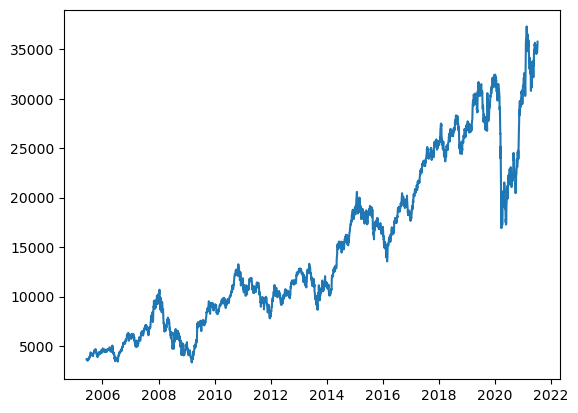

In [4]:
df=pd.read_csv(r"C:\Users\jayma\Downloads\archive (45)\NIFTY BANK.csv",parse_dates=['Date'], index_col='Date')
data=df
data=data.dropna()

# Rescale the data to the range [0, 1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Close']])
plt.plot(data.Close)

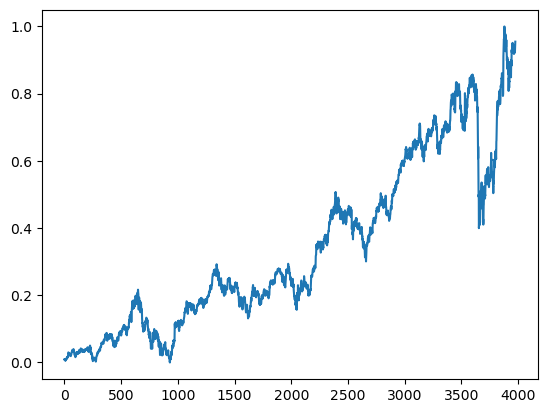

In [5]:
plt.plot(data_scaled)

Text(0.5, 1.0, 'Testing Data')

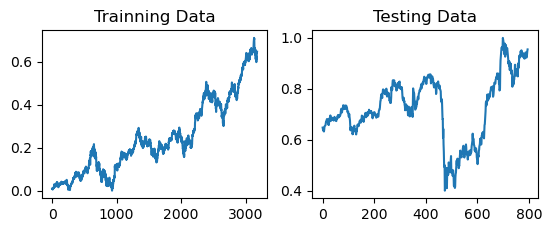

In [20]:
 #Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]
#starting 198 and ending 198 as train and test respectivily
plt.subplot(2,2,1)
plt.plot(train_data)
plt.title('Trainning Data')

plt.subplot(2,2,2)

plt.plot(test_data)
plt.title('Testing Data')


In [7]:
train_data[1:11]


array([[0.00747353],
       [0.00892643],
       [0.0103072 ],
       [0.01013203],
       [0.00821691],
       [0.00753977],
       [0.00565409],
       [0.00700101],
       [0.00651229],
       [0.00796077]])

In [8]:
#this concept applied
do=[1,2,3,4,5,6,7,8,9]
xx=[]
yy=[]
for i in range(len(do)-5):
    xx.append(do[i:i+5])
    yy.append(do[i+5])
    
print('original >',do) 
print('for x',xx)
print('for y',yy)

original > [1, 2, 3, 4, 5, 6, 7, 8, 9]
for x [[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8]]
for y [6, 7, 8, 9]


In [9]:


# Create sequences of data for training
sequence_length = 10  # Number of time steps to look back
X_train, y_train = [], []
for i in range(len(train_data)-sequence_length):
    X_train.append(train_data[i:i + sequence_length])
    y_train.append(train_data[i + sequence_length])
X_train, y_train = np.array(X_train), np.array(y_train)


In [10]:

# Prepare test sequences
X_test, y_test = [], []
for i in range(len(test_data) - sequence_length):
    X_test.append(test_data[i:i + sequence_length])
    y_test.append(test_data[i + sequence_length])
X_test, y_test = np.array(X_test), np.array(y_test)


In [11]:
X_train[5]

array([[0.00821691],
       [0.00753977],
       [0.00565409],
       [0.00700101],
       [0.00651229],
       [0.00796077],
       [0.00763693],
       [0.00756038],
       [0.00642102],
       [0.00727039]])

In [12]:
X_test

array([[[0.64754148],
        [0.64140897],
        [0.63604193],
        ...,
        [0.64931234],
        [0.65334572],
        [0.65442619]],

       [[0.64140897],
        [0.63604193],
        [0.63653653],
        ...,
        [0.65334572],
        [0.65442619],
        [0.65551403]],

       [[0.63604193],
        [0.63653653],
        [0.63893448],
        ...,
        [0.65442619],
        [0.65551403],
        [0.65669607]],

       ...,

       [[0.9283133 ],
        [0.92459493],
        [0.91956057],
        ...,
        [0.92539572],
        [0.92279905],
        [0.92650564]],

       [[0.92459493],
        [0.91956057],
        [0.92700907],
        ...,
        [0.92279905],
        [0.92650564],
        [0.93834375]],

       [[0.91956057],
        [0.92700907],
        [0.94283788],
        ...,
        [0.92650564],
        [0.93834375],
        [0.94915292]]])

In [13]:
X_train.shape

(3170, 10, 1)

In [14]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='Nadam',metrics=['accuracy'], loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=32)


# Make predictions on the test set
predictions = model.predict(X_test)


25/25 [==============================] - 0s 5ms/step


In [15]:

# Transform predictions and actual values back to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1961846.2736199975


In [16]:
data.index[train_size + sequence_length:]

DatetimeIndex(['2018-05-03', '2018-05-04', '2018-05-07', '2018-05-08',
               '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-14',
               '2018-05-15', '2018-05-16',
               ...
               '2021-06-24', '2021-06-25', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-05',
               '2021-07-06', '2021-07-07'],
              dtype='datetime64[ns]', name='Date', length=786, freq=None)

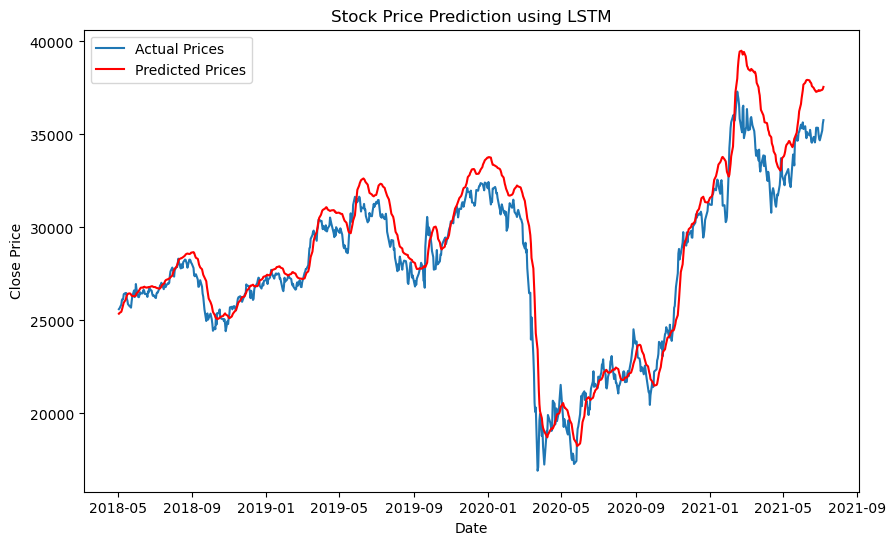

In [18]:
# Plot the actual vs. predicted prices

plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + sequence_length:], y_test, label='Actual Prices')
plt.plot(data.index[train_size + sequence_length:], predictions, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()
